# DO NOT RUN ANY OF THIS UNLESS YOU KNOW WHAT YOU'RE DOING

In [4]:
import pandas as pd
import random

In [ ]:
### DATASET CLEANING CODE, IGNORE UNLESS YOU KNOW WHAT THIS IS ###


# df = pd.read_csv("./temp/yield_df.csv")
# df = df.drop(df[df["Area"] != "India"].index)
# df = df.drop(columns=["Unnamed: 0", "Year", "Area"])
# df.rename(columns={"hg/ha_yield": "ton/ha_yield", "Item": "crop"}, inplace=True)
# df["ton/ha_yield"] = df["ton/ha_yield"] / 10 / 1000

# df.to_csv("./data/crop.yield.prediction.csv", index=False)

In [3]:
df = pd.read_csv("./data/crop.yield.prediction.csv")
df

,crop,ton/ha_yield,rainfall,pesticides_tonnes,temperature
0,Tapioca (Cassava),20.5381,1034.0,75000.0,25.58
1,Tapioca (Cassava),20.5381,975.0,75000.0,26.88
2,Tapioca (Cassava),20.5381,989.0,75000.0,25.79
3,Tapioca (Cassava),20.5381,940.0,75000.0,24.10
4,Tapioca (Cassava),20.5381,1061.0,75000.0,25.25
...,...,...,...,...,...
4043,Wheat,3.1538,835.0,45620.0,27.14
4044,Wheat,3.1538,660.0,45620.0,25.98
4045,Wheat,3.1538,711.0,45620.0,27.44
4046,Wheat,3.1538,842.0,45620.0,27.44


In [4]:
rainmap = {
    "Jowar": 400,
    "Maize": 750,
    "Potatoes": 1600,
    "Rice": 2375,
    "Soybeans": 750,
    "Sweet potatoes": 1125,
    "Tapioca (Cassava)": 1000,
    "Wheat": 750,
}

In [18]:
for i, row in df.iterrows():
    df.at[i, "rainfall"] = rainmap[df.at[i, "crop"]] + random.randrange(-100, 100, 1)

In [19]:
df

,crop,ton/ha_yield,rainfall,pesticides_tonnes,temperature
0,Tapioca (Cassava),20.5381,1034.0,75000.0,25.58
1,Tapioca (Cassava),20.5381,975.0,75000.0,26.88
2,Tapioca (Cassava),20.5381,989.0,75000.0,25.79
3,Tapioca (Cassava),20.5381,940.0,75000.0,24.10
4,Tapioca (Cassava),20.5381,1061.0,75000.0,25.25
...,...,...,...,...,...
4043,Wheat,3.1538,835.0,45620.0,27.14
4044,Wheat,3.1538,660.0,45620.0,25.98
4045,Wheat,3.1538,711.0,45620.0,27.44
4046,Wheat,3.1538,842.0,45620.0,27.44


In [20]:
df.to_csv("./data/crop.yield.prediction.csv", index=False)

Jowar prices at https://data.gov.in/resource/variety-wise-daily-market-prices-jowarsorghum-2020

In [5]:
df = pd.read_csv("./data/market/Jowar.csv")
df

,market,arrival_date,min_price,max_price,modal_price
0,Achalpur,02/01/2020,1550.0,2300.0,1925.0
1,Achalpur,09/01/2020,1550.0,2800.0,2175.0
2,Ahmednagar,01/01/2020,3500.0,4000.0,3800.0
3,Ahmednagar,02/01/2020,3500.0,3500.0,3500.0
4,Ahmednagar,03/01/2020,2000.0,4000.0,3000.0
...,...,...,...,...,...
708,Washim(Ansing),11/01/2020,1850.0,2000.0,1900.0
709,Yawal,01/01/2020,1030.0,1790.0,1360.0
710,Yawal,04/01/2020,1190.0,1720.0,1370.0
711,Yawal,13/01/2020,1270.0,1820.0,1460.0


In [6]:
df = df.sort_values(by=["market", "arrival_date"])

In [78]:
df.to_csv("./data/market/Jowar.csv", index=False)

In [84]:
df = pd.read_csv("./data/market/Rice.csv")
# df = df[(df["Centre_Name"] == "MUMBAI") | (df["Centre_Name"] == "NAGPUR")].drop(columns=["Commodity_Name"])

In [92]:
df = df.ffill()

In [93]:
df.to_csv("./data/market/Rice.csv", index=False)

In [2]:
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv("./data/market/Rice.csv")
df = df[df["Centre_Name"] == "NAGPUR"].drop(columns=["Centre_Name"])
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date", ascending=True)
df

,Date,Price
411,2010-08-31,1817.0
413,2010-09-01,1733.0
415,2010-09-03,1733.0
417,2010-09-06,1733.0
419,2010-09-07,1733.0
...,...,...
2686,2015-04-22,2217.0
2688,2015-04-23,2217.0
2690,2015-04-24,2217.0
2692,2015-04-27,2217.0


In [19]:
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
date_range

DatetimeIndex(['2010-08-31', '2010-09-01', '2010-09-02', '2010-09-03',
               '2010-09-04', '2010-09-05', '2010-09-06', '2010-09-07',
               '2010-09-08', '2010-09-09',
               ...
               '2015-04-19', '2015-04-20', '2015-04-21', '2015-04-22',
               '2015-04-23', '2015-04-24', '2015-04-25', '2015-04-26',
               '2015-04-27', '2015-04-28'],
              dtype='datetime64[ns]', length=1702, freq='D')

In [20]:
range_df = pd.DataFrame({'Date': date_range})
df = pd.merge(range_df, df, on='Date', how='left')
df['Price'].interpolate(method='linear', inplace=True)
df

,Date,Price
0,2010-08-31,1817.0
1,2010-09-01,1733.0
2,2010-09-02,1733.0
3,2010-09-03,1733.0
4,2010-09-04,1733.0
...,...,...
1697,2015-04-24,2217.0
1698,2015-04-25,2217.0
1699,2015-04-26,2217.0
1700,2015-04-27,2217.0


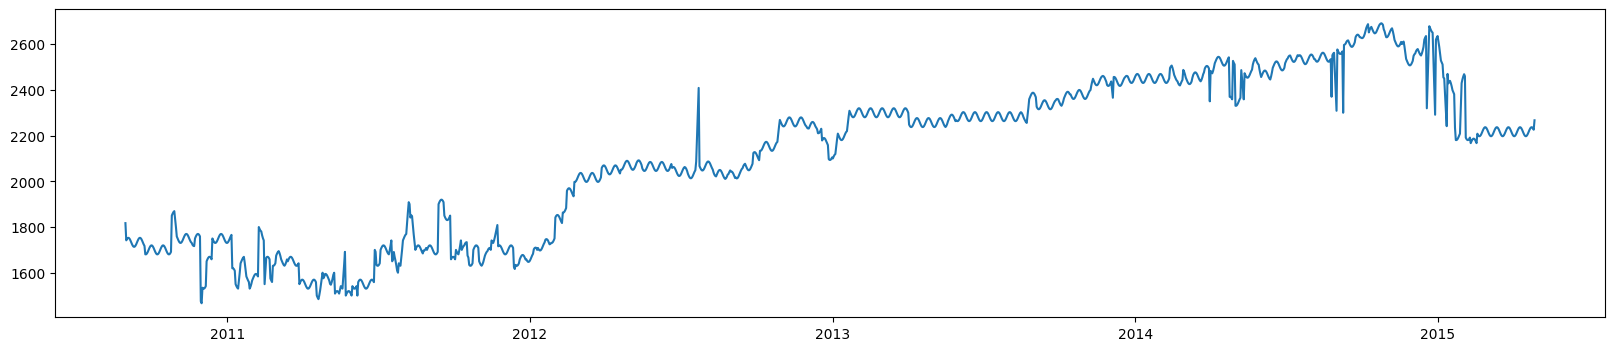

In [27]:
import math

i = 0

def tweak_prices(x):
    global i
    ret = 20 * math.sin(i) + x
    i += math.pi / 7
    return ret

i = 0
plt.figure(figsize=(20, 4))
plt.plot(df["Date"], df["Price"].apply(tweak_prices))

In [28]:
df["Price"] = df["Price"].apply(tweak_prices)

In [29]:
df.to_csv("./data/market/Rice.Nagpur.csv", index=False)